### **Insall nessaray libraries and packages**

In [ ]:
!pip install utils

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline
import pandas as pd

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

**Load the dataset**

In [ ]:
TRAIN_DIR_Female = '/content/drive/MyDrive/Reserch/Female/train/'
TEST_DIR_Female = '/content/drive/MyDrive/Reserch/Female/Test/'

# **Preprocess the dataset**

**Read Images from the data path**

In [ ]:
import cv2

In [ ]:
TRAIN_DIR_Female = '/content/drive/MyDrive/Reserch/Female/train/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_tr_female = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TRAIN_DIR_Female, dataset))
    count = len(img_list)
    emotion_counts_tr_female[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TRAIN_DIR_Female, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img = cv2.equalizeHist(input_img)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_train_female = np.array(img_data_list)
img_data_train_female = img_data_train_female.astype('float32')
img_data_train_female = img_data_train_female/ 255

# img_data_test_female = img_data_train_female.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_tr_female.items():
    print("{}: {}".format(emotion, count))


Loaded 1545 images for the dataset-angry

Loaded 562 images for the dataset-disgust

Loaded 2498 images for the dataset-fear

Loaded 2824 images for the dataset-happy

Loaded 2172 images for the dataset-neutral

Loaded 2788 images for the dataset-sad

Failed to read image: desktop.ini
Emotion Counts:
angry: 1545
disgust: 562
fear: 2498
happy: 2824
neutral: 2172
sad: 2788


In [ ]:
img_data_train_female.shape

(12388, 48, 48)

In [ ]:
TEST_DIR_Female = '/content/drive/MyDrive/Reserch/Female/Test/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']

img_data_list = []
emotion_counts_te_female = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TEST_DIR_Female, dataset))
    count = len(img_list)
    emotion_counts_te_female[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TEST_DIR_Female, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img = cv2.equalizeHist(input_img)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_test_female = np.array(img_data_list)
img_data_test_female = img_data_test_female.astype('float32')
img_data_test_female = img_data_test_female / 255

# img_data_test_female = img_data_test_female.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_te_female.items():
    print("{}: {}".format(emotion, count))


Loaded 314 images for the dataset-angry

Loaded 112 images for the dataset-disgust

Loaded 593 images for the dataset-fear

Loaded 588 images for the dataset-happy

Loaded 438 images for the dataset-neutral

Loaded 563 images for the dataset-sad

Emotion Counts:
angry: 314
disgust: 112
fear: 593
happy: 588
neutral: 438
sad: 563


In [ ]:
img_data_test_female.shape

(2608, 48, 48)

**Data set distribution**

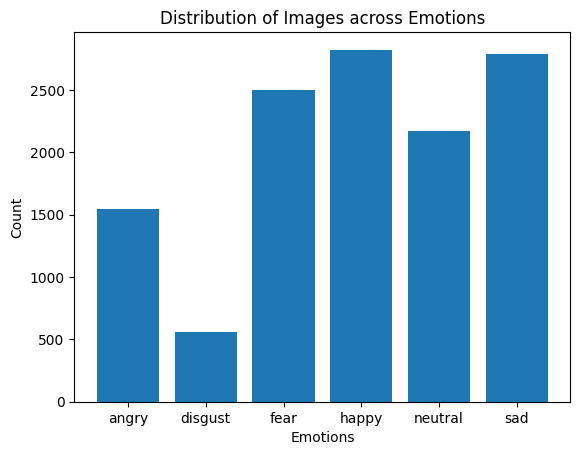

In [ ]:
emotions_tr_fe = list(emotion_counts_tr_female.keys())
counts_tr_fe = list(emotion_counts_tr_female.values())

# Create a bar chart
plt.bar(emotions_tr_fe,counts_tr_fe)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

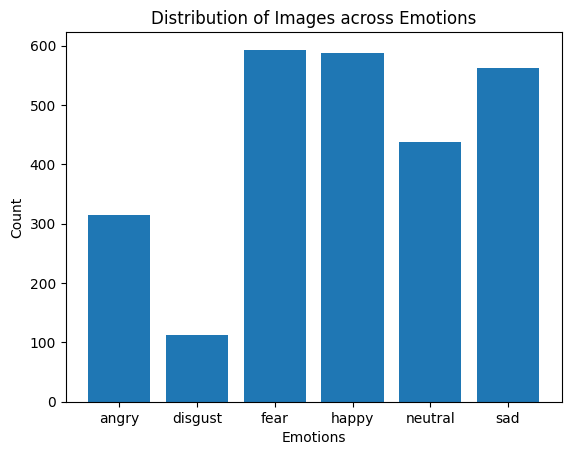

In [ ]:
emotions_te_fe = list(emotion_counts_te_female.keys())
counts_te_fe = list(emotion_counts_te_female.values())

# Create a bar chart
plt.bar(emotions_te_fe,counts_te_fe)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

**Define the number of classes**

In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_train_female = img_data_train_female.shape[0]

labels_train_female = np.ones((num_of_samples_train_female,), dtype='int64')
labels_train_female[0:1545] = 5  # 1545 Angry
labels_train_female[1545:2107] = 4  # 562 Disgust
labels_train_female[2107:4605] = 3  # 2498 Fear
labels_train_female[4605:7429] = 0  # 2824 Happy
labels_train_female[7429:9601] = 2  # 2172 neutral
labels_train_female[9601:] = 1  # 2788 Sad
# labels_train_female[8454:] = 2  # 1566 Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)


In [ ]:
labels_train_females = np.bincount(labels_train_female)

# Print the count of each label
for i, count in enumerate(labels_train_females):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 2824
SAD: 2787
NEUTRAL: 2172
FEAR: 2498
DISGUST: 562
ANGRY: 1545


In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_te_female = img_data_test_female.shape[0]

labels_test_female = np.ones((num_of_samples_te_female,), dtype='int64')
labels_test_female[0:314] = 5  # 314 Angry
labels_test_female[314:426] = 4  # 112 Disgust
labels_test_female[426:1019] = 3  # 593 Fear
labels_test_female[1019:1607] = 0  # 588 Happy
labels_test_female[1607:2045] = 2  #  438 neutral
labels_test_female[2045:] = 1  #  563 Sad
# labels_test_female[2589:] = 2  # 418 Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)


In [ ]:
labels_test_females = np.bincount(labels_test_female)

# Print the count of each label
for i, count in enumerate(labels_test_females):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 588
SAD: 563
NEUTRAL: 438
FEAR: 593
DISGUST: 112
ANGRY: 314


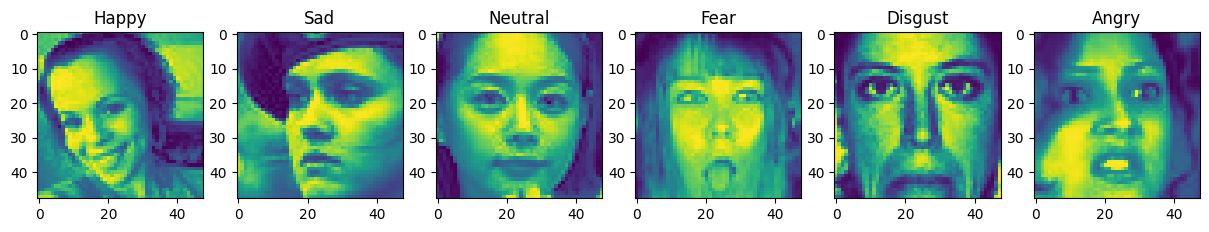

In [ ]:
import matplotlib.pyplot as plt

# Get index of images representing each expression
happy_idx = np.where(labels_test_female == 0)[0][0]
sad_idx = np.where(labels_test_female == 1)[0][0]
neutral_idx = np.where(labels_test_female == 2)[0][0]
fear_idx = np.where(labels_test_female == 3)[0][0]
disgust_idx = np.where(labels_test_female == 4)[0][0]
angry_idx = np.where(labels_test_female== 5)[0][0]

# Plotting the images
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
axs[0].imshow(img_data_test_female[happy_idx])
axs[0].set_title("Happy")
axs[1].imshow(img_data_test_female[sad_idx])
axs[1].set_title("Sad")
axs[2].imshow(img_data_test_female[neutral_idx])
axs[2].set_title("Neutral")
axs[3].imshow(img_data_test_female[fear_idx])
axs[3].set_title("Fear")
axs[4].imshow(img_data_test_female[disgust_idx])
axs[4].set_title("Disgust")
axs[5].imshow(img_data_test_female[angry_idx])
axs[5].set_title("Angry")

plt.show()


In [ ]:
print(labels_test_female.shape,labels_train_female.shape)

(2608,) (12388,)


**Convert the class label to one-hot encoding**

In [ ]:
# convert class labels to on-hot encoding# conve
Y_Fe_tr = to_categorical(labels_train_female, num_classes)
Y_Fe_ts = to_categorical(labels_test_female, num_classes)

In [ ]:
print(Y_Fe_tr.shape,Y_Fe_ts.shape)

(12388, 6) (2608, 6)


**Shuffle the dataset**

In [ ]:
#Shuffle the dataset
x_train_female,y_train_female = shuffle(img_data_train_female,Y_Fe_tr, random_state=2)
x_test_female,y_test_female = shuffle(img_data_test_female,Y_Fe_ts, random_state=2)

In [ ]:
X_train_female = x_train_female
Y_train_female =y_train_female
X_test_female =x_test_female
Y_test_female =y_test_female

In [ ]:
print(X_train_female.shape,Y_train_female.shape,X_test_female.shape,Y_test_female.shape)

(12388, 48, 48) (12388, 6) (2608, 48, 48) (2608, 6)


In [ ]:
# X_train_female = np.stack((X_train_female,)*3, axis = -1)
# X_test_female = np.stack((X_test_female,)*3, axis = -1)

In [ ]:
X_train_female = X_train_female.reshape(X_train_female.shape[0], X_train_female.shape[1], X_train_female.shape[2], 1)
X_test_female  = X_test_female .reshape(X_test_female .shape[0],X_test_female .shape[1], X_test_female .shape[2], 1)

# **Handling imbalncing**

**Class weights**

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels_train_female),
    y=labels_train_female
)

class_weights = dict(zip(np.unique(labels_train_female), class_weights))

In [ ]:
class_weights

{0: 0.7311142587346553,
 1: 0.7408204760196149,
 2: 0.9505831798649478,
 3: 0.8265278889778489,
 4: 3.6737841043890866,
 5: 1.336353829557713}

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Data Augmentation**

In [ ]:
# datagen = ImageDataGenerator(rotation_range=10)

In [ ]:
# from keras.utils.data_utils import Sequence
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.tensorflow import balanced_batch_generator

# class BalancedDataGenerator(Sequence):
#     """ImageDataGenerator + RandomOversampling"""
#     def __init__(self, x, y, datagen, batch_size=32):
#         self.datagen = datagen
#         self.batch_size = min(batch_size, x.shape[0])
#         datagen.fit(x)
#         self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
#         self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])

#     def __len__(self):
#         return self.steps_per_epoch

#     def __getitem__(self, idx):
#         x_batch, y_batch = self.gen.__next__()
#         x_batch = x_batch.reshape(-1, *self._shape[1:])
#         return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [ ]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,
                        rotation_range=10,
                        shear_range = 10,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)


balanced_gen_female = data_generator.flow(X_train_female,Y_train_female,)
# balanced_gen_female_val = data_generator.flow(X_test_female,Y_test_female,)

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image
#         width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

In [ ]:

# from keras.preprocessing.image import ImageDataGenerator

# datagennnn = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=False,
#         fill_mode='nearest')


In [ ]:
# it = datagennnn.flow(X_test_female, Y_test_female,batch_size=32)
# female = datagennnn.flow(X_train_female,Y_train_female, batch_size=32)

In [ ]:
# Create an instance of the data generator

# datagen = ImageDataGenerator(rotation_range=10,)
# balanced_gen_female = BalancedDataGenerator(X_train_female,Y_train_female, datagen, batch_size=32)
# balanced_gen_val_female= BalancedDataGenerator(X_test_female, Y_test_female, datagen, batch_size=64)

**Learning Rate Scheduler**

In [ ]:
class LossLearningRateScheduler(tf.keras.callbacks.History):
    """
    A learning rate scheduler that relies on changes in loss function
    value to dictate whether learning rate is decayed or not.
    LossLearningRateScheduler has the following properties:
    base_lr: the starting learning rate
    lookback_epochs: the number of epochs in the past to compare with the loss function at the current epoch to determine if progress is being made.
    decay_threshold / decay_multiple: if loss function has not improved by a factor of decay_threshold * lookback_epochs, then decay_multiple will be applied to the learning rate.
    spike_epochs: list of the epoch numbers where you want to spike the learning rate.
    spike_multiple: the multiple applied to the current learning rate for a spike.
    """

    def __init__(self, base_lr, lookback_epochs, spike_epochs = None, spike_multiple = 10, decay_threshold = 0.002, decay_multiple = 0.7, loss_type = 'val_loss'):

        super(LossLearningRateScheduler, self).__init__()

        self.base_lr = base_lr
        self.lookback_epochs = lookback_epochs
        self.spike_epochs = spike_epochs
        self.spike_multiple = spike_multiple
        self.decay_threshold = decay_threshold
        self.decay_multiple = decay_multiple
        self.loss_type = loss_type


    def on_epoch_begin(self, epoch, logs=None):

        if len(self.epoch) > self.lookback_epochs:

            current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)

            target_loss = self.history[self.loss_type]

            loss_diff =  target_loss[-int(self.lookback_epochs)] - target_loss[-1]

            if loss_diff <= np.abs(target_loss[-1]) * (self.decay_threshold * self.lookback_epochs):

                print(' '.join(('Changing learning rate from', str(current_lr), 'to', str(current_lr * self.decay_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.decay_multiple)
                current_lr = current_lr * self.decay_multiple

            else:

                print(' '.join(('Learning rate:', str(current_lr))))

            if self.spike_epochs is not None and len(self.epoch) in self.spike_epochs:
                print(' '.join(('Spiking learning rate from', str(current_lr), 'to', str(current_lr * self.spike_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.spike_multiple)

        else:

            print(' '.join(('Setting learning rate to', str(self.base_lr))))
            tf.keras.backend.set_value(self.model.optimizer.lr, self.base_lr)


        return tf.keras.backend.get_value(self.model.optimizer.lr)



In [ ]:
callback_lr = LossLearningRateScheduler(base_lr=0.001, lookback_epochs=5)

In [ ]:
filepath = '/content/drive/MyDrive/Reserch/best_model_cifar10fem.hdf5'
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

stop = EarlyStopping(monitor='val_accuracy', patience =5,
                      verbose=0, mode='auto', baseline=None,
                      restore_best_weights=False)

callbacks = [checkpoint,stop,callback_lr]

In [ ]:
from keras import layers


# **Model Buliding**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization
from keras.regularizers import l2  # Import l2 function

In [ ]:
img_size = 48

In [ ]:
# model = Sequential()
# model.add(Conv2D(64,kernel_size=(3,3),padding='same',kernel_regularizer=l2(0.001),activation='relu',input_shape=(img_size,img_size,1)))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.4))

# model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation='relu'))
# model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.4))

# model.add(Conv2D(512,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation='relu'))
# model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
# model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.4))

# model.add(Flatten())


# model.add(Dense(1024,kernel_regularizer=l2(0.001),activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(6,activation='softmax'))

# model.summary()

In [ ]:

    num_classes = 6
    model = Sequential()
    #the 1-st block
    model.add(Conv2D(64,(3,3),padding='same',input_shape =(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(5,5),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(512,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes,activation='softmax'))



    print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
# pip install efficientnet

In [ ]:
# pip install tensorflow

In [ ]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense

In [ ]:
# from keras.models import Model
# from keras.applications import DenseNet121
# from keras.applications import vgg16
# from keras.applications.inception_v3 import InceptionV3
# # from keras.applications.resnet50 import ResNet50
# from keras.applications import MobileNet
# import efficientnet.keras as efn

# def construct_transfer_learning_model(model_name) :
#     if model_name == 'MobileNet' :
#         base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))#imports the mobilenet model and discards the last 1000 neuron layer.
#         base_model.trainable = True
#         for layer in base_model.layers[:-10] :
#             layer.trainable = True
#     elif model_name == 'VGG16' :
#         base_model=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
#         base_model.trainable = True
#         for layer in base_model.layers[:-3] :
#             layer.trainable = True
#     elif model_name == 'DenseNet' :
#         base_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
#         base_model.trainable = True
#         for layer in base_model.layers[:-10] :
#             layer.trainable = True
#     elif model_name == 'Inception' :
#         base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
#         base_model.trainable = True
#         for layer in base_model.layers[:-10] :
#             layer.trainable = True
#     elif model_name == 'ResNet' :
#         base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
#         base_model.trainable = True
#         for layer in base_model.layers[:-10] :
#             layer.trainable = True
#     elif model_name == 'EfficientNet' :
#         base_model = efn.EfficientNetB3(weights = 'imagenet', include_top=False, input_shape = (img_size,img_size,3))
#         base_model.trainable = True
#         for layer in base_model.layers[:-10] :
#             layer.trainable = True
#     x=base_model.output
#     x=GlobalAveragePooling2D()(x)
#     x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#     x=Dropout(0.3)(x)
#     x=Dense(512,activation='relu')(x) #dense layer 2
#     preds=Dense(6,activation='softmax')(x) #final layer with softmax activation
#     model=Model(inputs=base_model.input,outputs=preds)
#     model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
#     return model

# model = construct_transfer_learning_model('ResNet')
# history = model.fit_generator(balanced_gen_female,
#                     epochs = 100,
#                     class_weight=class_weights,
#                     verbose = True,
#                     validation_data= (X_test_female, Y_test_female),
#                     callbacks=callbacks
#                    )

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# def residual_block(x, filters, kernel_size=3, strides=1):
#     shortcut = x

#     x = Conv2D(filters, kernel_size, strides=strides, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     x = Conv2D(filters, kernel_size, strides=1, padding="same")(x)
#     x = BatchNormalization()(x)

#     if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
#         shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)

#     x = tf.keras.layers.add([x, shortcut])
#     x = Activation("relu")(x)

#     return x

# # Define the ResNet architecture
# input_shape = (48, 48, 1)
# inputs = Input(shape=input_shape)
# x = Conv2D(16, 3, strides=1, padding="same")(inputs)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)

# n = 6  # Increase the number of residual blocks
# for _ in range(n):
#     x = residual_block(x, filters=16)

# x = residual_block(x, filters=32, strides=2)
# for _ in range(n - 1):
#     x = residual_block(x, filters=32)

# x = residual_block(x, filters=64, strides=2)
# for _ in range(n - 1):
#     x = residual_block(x, filters=64)

# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = GlobalAveragePooling2D()(x)

# outputs = Dense(6, activation="softmax")(x)  # 6 classes for emotion recognition

# # Create the model
# model = Model(inputs, outputs)

# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# # Print model summary
# model.summary()


# **Train the model**

In [ ]:
batch = 32
epoch = 50
optimizer = Adam(beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(balanced_gen_female, batch_size=batch, class_weight=class_weights, epochs=epoch, class_weight=class_weights,validation_data=(X_test_female,Y_test_female),callbacks=callbacks)

Setting learning rate to 0.001
Epoch 1/50
388/388 [==============================] - ETA: 0s - loss: 1.8557 - accuracy: 0.2431
Epoch 1: val_accuracy improved from -inf to 0.33589, saving model to /content/drive/MyDrive/Reserch/best_model_cifar10.hdf5
388/388 [==============================] - 22s 36ms/step - loss: 1.8557 - accuracy: 0.2431 - val_loss: 1.6144 - val_accuracy: 0.3359
Setting learning rate to 0.001
Epoch 2/50
387/388 [============================>.] - ETA: 0s - loss: 1.6468 - accuracy: 0.3237
Epoch 2: val_accuracy improved from 0.33589 to 0.36541, saving model to /content/drive/MyDrive/Reserch/best_model_cifar10.hdf5
388/388 [==============================] - 11s 29ms/step - loss: 1.6466 - accuracy: 0.3239 - val_loss: 1.5316 - val_accuracy: 0.3654
Setting learning rate to 0.001
Epoch 3/50
387/388 [============================>.] - ETA: 0s - loss: 1.5338 - accuracy: 0.3697
Epoch 3: val_accuracy improved from 0.36541 to 0.39072, saving model to /content/drive/MyDrive/Reserch

In [ ]:
loss, accuracy = model.evaluate(X_test_female,Y_test_female)

82/82 [==============================] - 1s 8ms/step - loss: 0.9901 - accuracy: 0.6262


**Prediction results**

In [ ]:
# Assuming you have a trained model named 'model' and training data X_train and corresponding labels Y_train

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_female)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_female), num_examples)

# Display the predicted and actual labels for the selected examples
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_female[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    print("Example {}: Predicted label = {}, Actual label = {}".format(index, predicted_emotion, actual_emotion))

388/388 [==============================] - 2s 5ms/step
Example 7169: Predicted label = happy, Actual label = happy
Example 6323: Predicted label = neutral, Actual label = neutral
Example 2980: Predicted label = happy, Actual label = happy
Example 3491: Predicted label = fear, Actual label = fear
Example 11728: Predicted label = neutral, Actual label = neutral
Example 7335: Predicted label = fear, Actual label = fear
Example 8775: Predicted label = neutral, Actual label = sad
Example 120: Predicted label = sad, Actual label = fear
Example 10648: Predicted label = sad, Actual label = sad
Example 8294: Predicted label = neutral, Actual label = neutral


In [ ]:
from tabulate import tabulate

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_female)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_female), num_examples)

# Prepare the data for the table
table_data = []
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_female[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    table_data.append([index, predicted_emotion, actual_emotion])

# Display the table
table_headers = ["Example", "Predicted Label", "Actual Label"]
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)


388/388 [==============================] - 2s 5ms/step
╒═══════════╤═══════════════════╤════════════════╕
│   Example │ Predicted Label   │ Actual Label   │
╞═══════════╪═══════════════════╪════════════════╡
│      4624 │ angry             │ angry          │
├───────────┼───────────────────┼────────────────┤
│        80 │ happy             │ happy          │
├───────────┼───────────────────┼────────────────┤
│      2305 │ fear              │ fear           │
├───────────┼───────────────────┼────────────────┤
│      2053 │ fear              │ neutral        │
├───────────┼───────────────────┼────────────────┤
│      6533 │ fear              │ fear           │
├───────────┼───────────────────┼────────────────┤
│     11694 │ angry             │ angry          │
├───────────┼───────────────────┼────────────────┤
│      9821 │ angry             │ angry          │
├───────────┼───────────────────┼────────────────┤
│      1807 │ disgust           │ disgust        │
├───────────┼──────────────

In [ ]:
def plotting_epochs(training_, validation_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

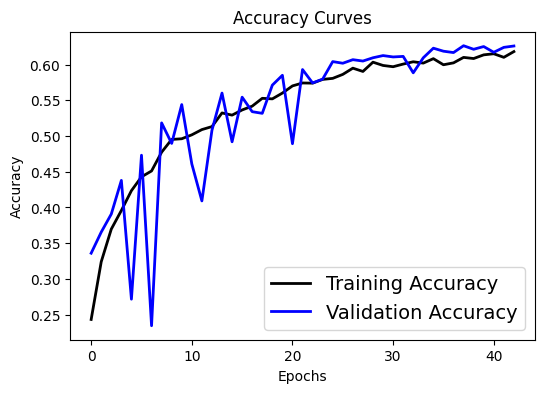

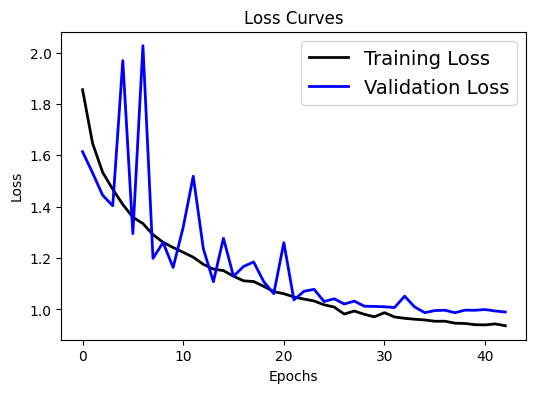

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

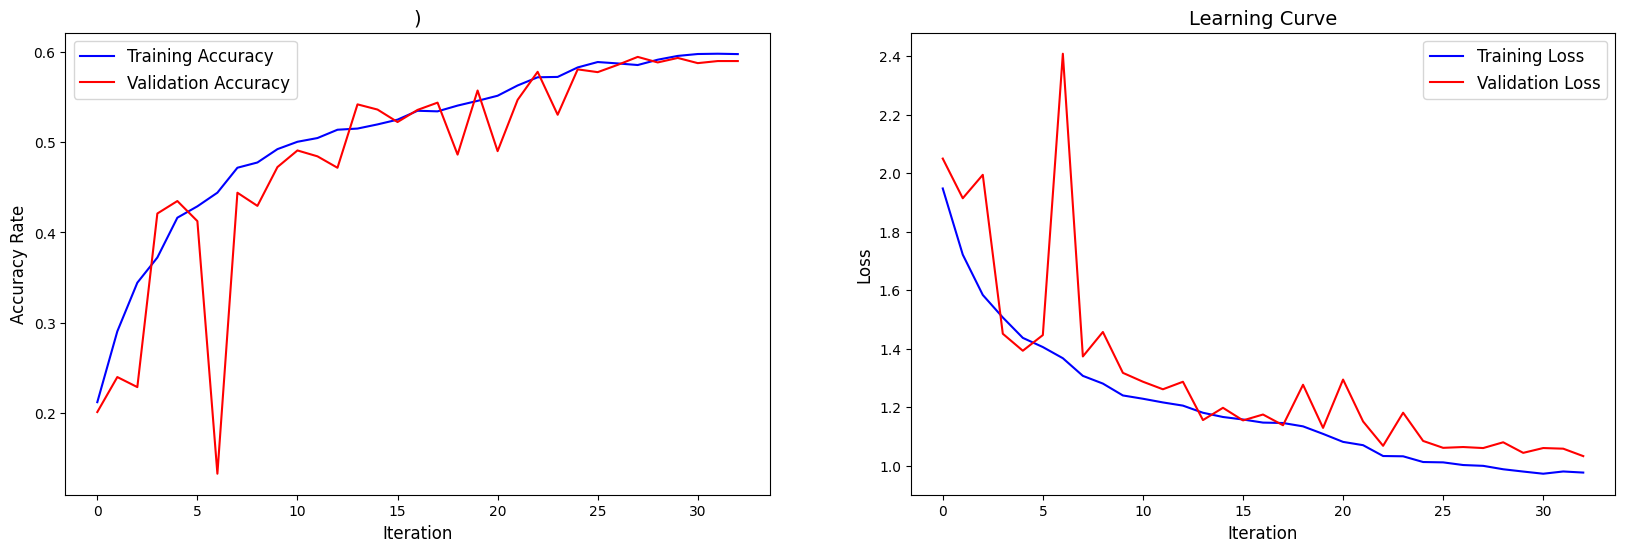

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title(')',fontsize=14)

ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

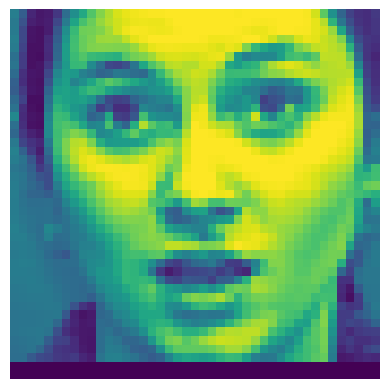

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S057_001_00000019.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()


In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'suprise',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 0s 364ms/step
suprise


In [ ]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

1/1 [==============================] - 0s 20ms/step
suprise


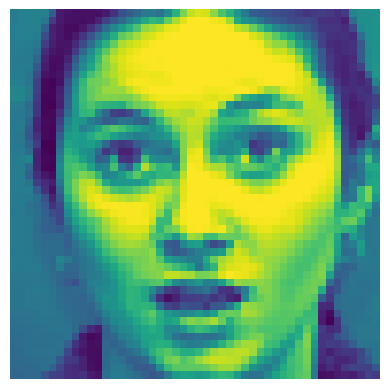

In [ ]:
# Load and display the original image
original_image = Image.fromarray(image)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

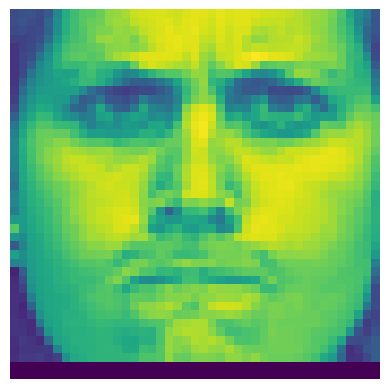

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S999_001_00000018.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()

In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'neutral',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 0s 28ms/step
angry


In [ ]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

1/1 [==============================] - 0s 29ms/step
angry


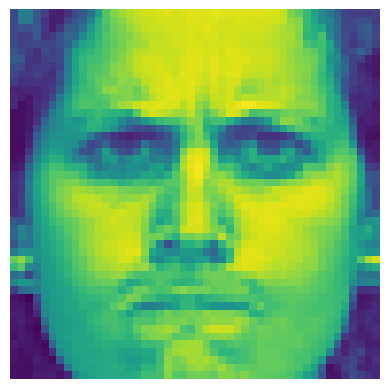

In [ ]:
# Load and display the original image
original_image = Image.fromarray(image)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

In [ ]:
# #fucntion trains the model and saves the best model at the checkpoint
# @calc_time
# def emotion_recognition_model(x_train,y_train,x_val,y_val):
#     #reduce the laerning rate if plateau is encountered
#     reduceLR = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.001)
#     #early stopping method is used to montior the loss if there are no significant reductions in loss then halt the training
#     earlyStop = EarlyStopping(monitor='loss', patience=20)
#     #checkpoint to save the best model with highest validation accuracy
#     filepath = "C:/Users/asus/Desktop/Y4S1/research/dataset/male-emotion-recognition.hdf5"
#     checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#     #create a combined list of reduce learning rate, early stopping and checkpoint
#     callbacks_list = [reduceLR,earlyStop,checkpoint]

#     def residual_block(x, filters, conv_num=3, activation="relu"):
#         #fucntion is used to create residual blocks and add residual blocks
#         s = Conv1D(filters, 1, padding="same")(x)
#         for i in range(conv_num - 1):
#             x = Conv1D(filters, 3, padding="same")(x)
#             x = Activation(activation)(x)
#         x = Conv1D(filters, 3, padding="same")(x)
#         x = Add()([x, s])
#         x = Activation(activation)(x)

#         return x
#         #fucntion to build the model

#     def build_model():
#         inputs =  Input(shape=(x_train.shape[1],1))
#         x = Dense(256, activation="relu")(inputs)
#         x = residual_block(x, 16, 2)
#         x = residual_block(x, 32, 2)
#         x = residual_block(x, 32, 2)
#         x = residual_block(x, 64, 3)
#         x = residual_block(x, 64, 3)
#         x = residual_block(x, 128, 3)
#         x = residual_block(x, 128, 3)
#         #perform the average pooling after last residual block
#         x = AveragePooling1D(pool_size=3, strides=3)(x)
#         x = Flatten()(x)
#         x = Dense(256, activation="relu")(x)
#         x = Dense(128, activation="relu")(x)
#         outputs = Dense(6, activation="softmax", name="output")(x)

#         return Model(inputs=inputs, outputs=outputs)

#     res_model = build_model()
#     #display the summary of the model
#     res_model.summary()
#     #complie the model
#     res_model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=1e-4, decay=1e-4 / 50) , metrics=['accuracy'])
#     history = res_model.fit(np.expand_dims(x_train,-1),y_train,
#                         validation_data=(np.expand_dims(x_val, -1), y_val),
#                         epochs=500,
#                         batch_size=32,
#                         shuffle=True,
#                         workers=50,
#                         verbose=1,
#                         use_multiprocessing=True,
#                         callbacks = callbacks_list)

In [ ]:
# def identity_block(X, f, filters, stage, block):
#     """
#     Implementation of the identity block

#     Arguments:
#     X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f -- integer, specifying the shape of the middle CONV's window for the main path
#     filters -- python list of integers, defining the number of filters in the CONV layers of the main path
#     stage -- integer, used to name the layers, depending on their position in the network
#     block -- string/character, used to name the layers, depending on their position in the network

#     Returns:
#     X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value. You'll need this later to add back to the main path.
#     X_shortcut = X

#     # First component of main path
#     X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
#     X = Activation('relu')(X)


#     # Second component of main path
#     X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
#     X = Activation('relu')(X)

#     # Third component of main path
#     X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)


#     return X

In [ ]:
# def convolutional_block(X, f, filters, stage, block, s = 2):
#     """
#     Implementation of the convolutional block

#     Arguments:
#     X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f -- integer, specifying the shape of the middle CONV's window for the main path
#     filters -- python list of integers, defining the number of filters in the CONV layers of the main path
#     stage -- integer, used to name the layers, depending on their position in the network
#     block -- string/character, used to name the layers, depending on their position in the network
#     s -- Integer, specifying the stride to be used

#     Returns:
#     X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value
#     X_shortcut = X


#     ##### MAIN PATH #####
#     # First component of main path
#     X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
#     X = Activation('relu')(X)


#     # Second component of main path
#     X = Conv2D(F2, (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer=glorot_uniform(seed =0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
#     X = Activation('relu') (X)

#     # Third component of main path
#     X = Conv2D(F3, (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer=glorot_uniform(seed =0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

#     ##### SHORTCUT PATH ####
#     X_shortcut = Conv2D(F3, (1,1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer=glorot_uniform(seed =0))(X_shortcut)
#     X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)


#     return X